# Software Survey Results

These are the results fromt the survey carried out between December 12, 2014 and January 23, 2015. A total of 1142 people with who identify as involved in research participated in the survey. Of these, 380 are graduate students, 340 are postdocs, 385 are research scientists and faculty. The remainder are undergraduate students (10), emeritus professors, support scientists at observatories, etc.

For discussion of these plots, see the associated paper.

In [84]:
from __future__ import division

import astropy
import astropy.table
import astropy.io.ascii
import numpy as np
from scipy import optimize

In [85]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

save_plots = True # set to true to save the plots to disk in addition to showing them in the notebook

In [86]:
data = astropy.io.ascii.read('questionaire_data_nocomments.csv', comment='#', delimiter=',')

## Do you use software in your research?

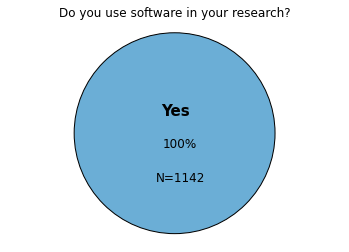

In [87]:
#plt.pie([len(data['training']),0], colors=['#6baed6','#6baed6'], autopct=None, shadow=False, startangle=90)
#can't use pie because it makes an ugly line in the middle if we're at 100% yes
plt.gca().add_patch(plt.Circle((0, 0), .9, fc='#6baed6', ec='k'))
# pie does this automatically, but because we're using Circle we have to manually hide the axes
plt.gca().set_frame_on(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])

plt.title('Do you use software in your research?')
plt.text(0.0, 0.2,'Yes',fontsize=15, fontweight='bold', horizontalalignment='center',
         verticalalignment='center',)
plt.text(0.05, -0.1, '100%', fontsize=12, horizontalalignment='center',
         verticalalignment='center',)
plt.text(0.05, -0.4, 'N=1142', fontsize=12, horizontalalignment='center',
         verticalalignment='center',)

if save_plots:
    plt.savefig('use_software.png')

## Have you had formal training in software development?

['Yes', 'No', 'A little']
All:  7.8+-0.8,  43.1+-1.9,  49.1+-2.1
Grads:  7.1+-1.4,  39.8+-3.2,  53.0+-3.7
Postdoc:  8.5+-1.6,  38.8+-3.4,  52.6+-3.9
Faculty:  8.1+-1.4,  49.9+-3.6,  42.1+-3.3


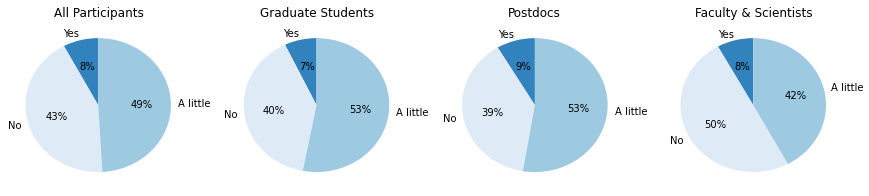

In [88]:
nn_all = [np.sum(data['training'] == 'Yes'), np.sum(data['training'] == 'No'), np.sum(data['training'] == 'Little')]
grad = data['career'] == 'Graduate student'
postdoc = data['career'] == 'Postdoc'
faculty = (data['career'] == 'Faculty') | (data['career'] == 'Research scientist')
nn_grad = [np.sum((grad) & (data['training'] == 'Yes')), np.sum((grad) & (data['training'] == 'No')), np.sum((grad) & (data['training'] == 'Little'))]
nn_postdoc = [np.sum((postdoc) & (data['training'] == 'Yes')), np.sum((postdoc) & (data['training'] == 'No')), np.sum((postdoc) & (data['training'] == 'Little'))]
nn_faculty = [np.sum((faculty) & (data['training'] == 'Yes')), np.sum((faculty) & (data['training'] == 'No')), np.sum((faculty) & (data['training'] == 'Little'))]

matplotlib.rcParams['font.size'] = 10

fig,axes = plt.subplots(1, 4, sharey=False, figsize=(15,3))

fig = plt.figure(1,figsize=(12,3))
a1 = plt.subplot(1,4,1)
labels = ['Yes','No','A little']
colors=['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All Participants')
a2 = plt.subplot(1,4,2)
a2.pie(nn_grad, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Graduate Students')
a3 = plt.subplot(1,4,3)
a3.pie(nn_postdoc, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('Postdocs')
a4 = plt.subplot(1,4,4)
a4.pie(nn_faculty, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Faculty & Scientists')

if save_plots:
    plt.savefig('training_by_career.png')
    
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_grad)*100./np.sum(nn_grad)
a_err = np.sqrt(nn_grad)*100./np.sum(nn_grad)
print 'Grads: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_postdoc)*100./np.sum(nn_postdoc)
a_err = np.sqrt(nn_postdoc)*100./np.sum(nn_postdoc)
print 'Postdoc: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_faculty)*100./np.sum(nn_faculty)
a_err = np.sqrt(nn_faculty)*100./np.sum(nn_faculty)
print 'Faculty: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


## Do you write your own software?

['My Own', 'Both', 'Others']
All: 32.7+-1.7,  56.8+-2.2,  10.5+-1.0
Grads: 30.0+-2.8,  59.5+-4.0,  10.5+-1.7
Postdoc: 38.8+-3.4,  52.9+-3.9,   8.2+-1.6
Faculty: 31.2+-2.8,  57.4+-3.9,  11.4+-1.7


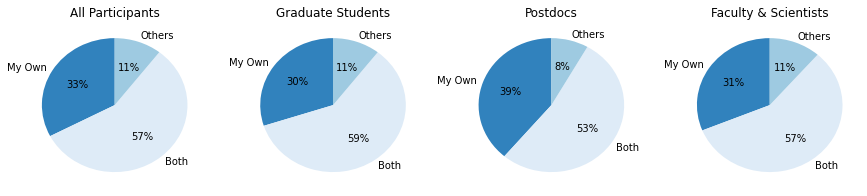

In [89]:
nn_all = [np.sum(data['own'] == 'Own'), np.sum(data['own'] == 'Between'), np.sum(data['own'] == 'Others')]
nn_grad = [np.sum((grad) & (data['own'] == 'Own')), np.sum((grad) & (data['own'] == 'Between')), np.sum((grad) & (data['own'] == 'Others'))]
nn_postdoc = [np.sum((postdoc) & (data['own'] == 'Own')), np.sum((postdoc) & (data['own'] == 'Between')), np.sum((postdoc) & (data['own'] == 'Others'))]
nn_faculty = [np.sum((faculty) & (data['own'] == 'Own')), np.sum((faculty) & (data['own'] == 'Between')), np.sum((faculty) & (data['own'] == 'Others'))]

fig,axes = plt.subplots(1, 4, sharey=False, figsize=(15,3))

fig = plt.figure(1,figsize=(12,3))
a1 = plt.subplot(1,4,1)
labels = ['My Own','Both','Others']
colors = ['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All Participants')
a2 = plt.subplot(1,4,2)
a2.pie(nn_grad, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Graduate Students')
a3 = plt.subplot(1,4,3)
a3.pie(nn_postdoc, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('Postdocs')
a4 = plt.subplot(1,4,4)
a4.pie(nn_faculty,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Faculty & Scientists')

if save_plots:
    plt.savefig('own_by_career.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_grad)*100./np.sum(nn_grad)
a_err = np.sqrt(nn_grad)*100./np.sum(nn_grad)
print 'Grads: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_postdoc)*100./np.sum(nn_postdoc)
a_err = np.sqrt(nn_postdoc)*100./np.sum(nn_postdoc)
print 'Postdoc: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_faculty)*100./np.sum(nn_faculty)
a_err = np.sqrt(nn_faculty)*100./np.sum(nn_faculty)
print 'Faculty: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


### Cross correlation w/ formal training a.k.a. "Do you have training for your job"?

[39, 150, 184] [15, 43, 56] [12, 46, 74] [11, 60, 49]
['Yes', 'No', 'A little']
All: 10.5+-1.7,  40.2+-3.3,  49.3+-3.6
Grads: 13.2+-3.4,  37.7+-5.8,  49.1+-6.6
Postdoc:  9.1+-2.6,  34.8+-5.1,  56.1+-6.5
Faculty:  9.2+-2.8,  50.0+-6.5,  40.8+-5.8


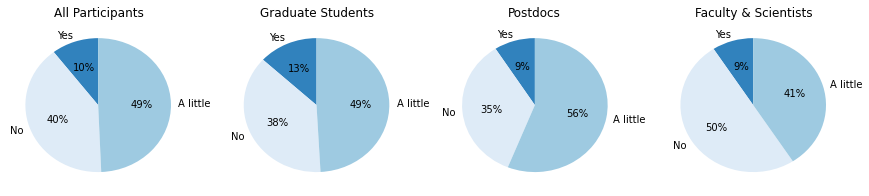

In [90]:
onlyothers = (data['own'] == 'Others') | (data['own'] == 'Between')
untrained = data['training'] == 'No'
trained = data['training'] == 'Yes'

labels = ['Yes', 'No', 'A little']
nn_all = [np.sum(trained&~onlyothers), np.sum(untrained&~onlyothers), np.sum(~untrained&~trained&~onlyothers)]
nn_grad = [np.sum(trained&~onlyothers&grad), np.sum(untrained&~onlyothers&grad), np.sum(~untrained&~trained&~onlyothers&grad)]
nn_postdoc = [np.sum(trained&~onlyothers&postdoc), np.sum(untrained&~onlyothers&postdoc), np.sum(~untrained&~trained&~onlyothers&postdoc)]
nn_faculty = [np.sum(trained&~onlyothers&faculty), np.sum(untrained&~onlyothers&faculty), np.sum(~untrained&~trained&~onlyothers&faculty)]
print nn_all, nn_grad, nn_postdoc, nn_faculty

fig,axes = plt.subplots(1, 4, sharey=False, figsize=(15,3))

fig = plt.figure(1,figsize=(12,3))
a1 = plt.subplot(1,4,1)
colors = ['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All Participants')
a2 = plt.subplot(1,4,2)
a2.pie(nn_grad, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Graduate Students')
a3 = plt.subplot(1,4,3)
a3.pie(nn_postdoc, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('Postdocs')
a4 = plt.subplot(1,4,4)
a4.pie(nn_faculty,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Faculty & Scientists')

if save_plots:
    plt.savefig('are_we_trained.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_grad)*100./np.sum(nn_grad)
a_err = np.sqrt(nn_grad)*100./np.sum(nn_grad)
print 'Grads: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_postdoc)*100./np.sum(nn_postdoc)
a_err = np.sqrt(nn_postdoc)*100./np.sum(nn_postdoc)
print 'Postdoc: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_faculty)*100./np.sum(nn_faculty)
a_err = np.sqrt(nn_faculty)*100./np.sum(nn_faculty)
print 'Faculty: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


## Most Common Sofware Tools

We suggested 19 options. Users added 64 options. A total of 83 (mostly) unique software tools. 10 responders did not provide an answer to this question. C and C++ are considered together. There are 4 items in the top-20 list that were not on our original list: C++, Mathematica, gnuplot and awk.

In [91]:
for ii in range(len(data['software'])):
      if data['software'][ii]:
            data['software'][ii] = str(data['software'][ii])
            data['software'][ii] = data['software'][ii].replace('sm or supermongo','sm/supermongo')
            data['software'][ii] = data['software'][ii].replace('Excel or other spreadsheet','Excel/spreadsheet')
            data['software'][ii] = data['software'][ii].replace('Shell Scripting','shell')
            data['software'][ii] = data['software'][ii].replace(' sm-like interface to pgplot. Basically wrote own language ages ago and still cling to it.','')
            data['software'][ii] = data['software'][ii].replace('(which are python-based)','')
            data['software'][ii] = data['software'][ii].replace(' within shell scripting:','')
            data['software'][ii] = data['software'][ii].replace('extension','')
            data['software'][ii] = data['software'][ii].replace('package','')
            data['software'][ii] = data['software'][ii].replace('Marthematica','Mathematica')
            data['software'][ii] = data['software'][ii].replace('II','')
            data['software'][ii] = data['software'][ii].replace('(for data viz & edu tools)','')
            data['software'][ii] = data['software'][ii].replace(' tools','')
            data['software'][ii] = data['software'][ii].replace('-- the ancient "European" IRAF','')
            data['software'][ii] = data['software'][ii].replace('(GNU)','').replace('(USGS)','')
            data['software'][ii] = data['software'][ii].replace('tex','latex')
            data['software'][ii] = data['software'][ii].replace('and','')
            data['software'][ii] = data['software'][ii].replace('.','')

tools_all = []
tools_grad = []
tools_postdoc = []
tools_faculty = []

for entry, career in zip(data['software'],data['career']):
    if entry:
        entries = entry.lower().strip().split(' ')
        
        for ii in entries:
            if ii != '':
                if ii == 'c': ii = 'c/c++'
                if ii == 'c++': ii = 'c/c++'
                tools_all.append(ii)
                if career == 'Graduate student':
                    tools_grad.append(ii)
                if career == 'Postdoc':
                    tools_postdoc.append(ii)
                if (career == 'Faculty') or (career == 'Research scientist'):
                    tools_faculty.append(ii)
                    
tools_all = np.array(tools_all)

print np.unique(tools_all), len(np.unique(tools_all))
unique_tools = np.unique(tools_all)
print 'Unique tools for grads: {}; postdocs: {}; faculty & scientists: {}'.format(len(np.unique(tools_grad)), len(np.unique(tools_postdoc)), len(np.unique(tools_faculty)))

['aips' 'awk' 'bash' 'c#' 'c++/cuda' 'c/c++' 'casa' 'cern' 'ciao' 'cuda'
 'cudac' 'cvs' 'd3js' 'daophot' 'difmap' 'dpuser' 'ds9' 'emacs'
 'excel/spreadsheet' 'figaro' 'fortran' 'ftools' 'gildas' 'git' 'gnuplot'
 'groovy' 'haskell' 'heasarc' 'heasoft' 'html/css' 'idl' 'igor' 'imagej'
 'iraf' 'iris' 'isis' 'isis/s-lang' 'java' 'javascript' 'julia' 'jython'
 'kate' 'kile' 'labview' 'latex' 'maple' 'mathematica' 'matlab' 'midas'
 'miriad' 'mongodb' 'objective-c' 'octave' 'pdl' 'perl' 'pgplot' 'phoebe'
 'php' 'poc' 'postscript' 'python' 'r' 'root' 'ruby' 'rust' 's-lang' 'sed'
 'shell' 'sm/supermongo' 'sql' 'stan' 'stilts' 'tcl' 'vbscript' 'viml'
 'vista' 'vo' 'wavemetrics' 'ximage' 'xmgrace' 'xmm-sas' 'yorick' 'yt'] 83
Unique tools for grads: 46; postdocs: 37; faculty & scientists: 65


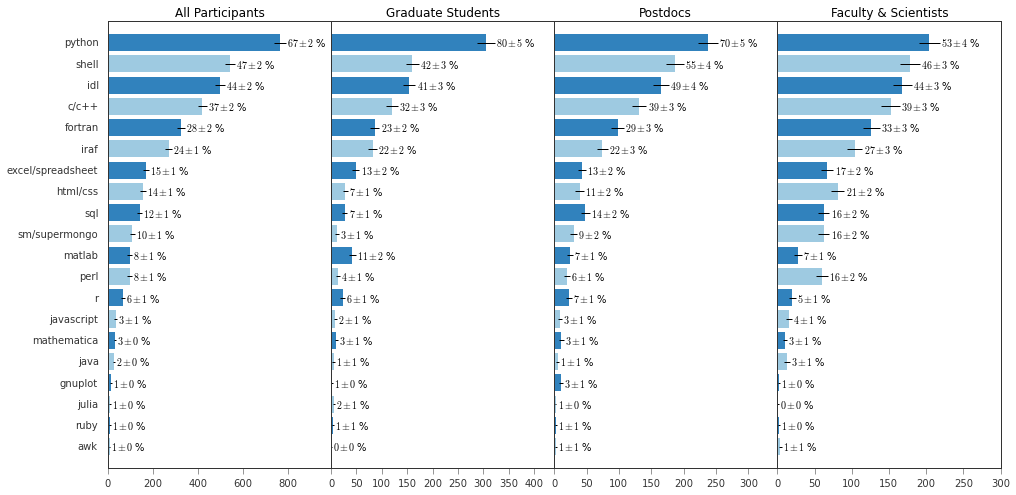

In [92]:
import math
from matplotlib.ticker import MaxNLocator, MultipleLocator

len_data = 20

nn = [(ff, np.sum(np.array(tools_all) == ff)) for ff in unique_tools]
nn = sorted(nn, key=lambda tup: tup[1], reverse=True)
language_names = [element[0] for element in nn[0:len_data]]
all_nn = np.array([element[1] for element in nn[0:len_data]])
n_all = len(data)

tools_grad_nn = {}
tools_grad_nn.update({ff: np.sum(np.array(tools_grad) == ff) for ff in unique_tools})
g_nn = np.array([tools_grad_nn[name] for name in language_names])
n_g = np.sum(data['career']=='Graduate student')


tools_postdoc_nn = {}
tools_postdoc_nn.update({ff: np.sum(np.array(tools_postdoc) == ff) for ff in unique_tools})
p_nn = np.array([tools_postdoc_nn[name] for name in language_names])
n_p = np.sum(data['career']=='Postdoc')

tools_faculty_nn = {}
tools_faculty_nn.update({ff: np.sum(np.array(tools_faculty) == ff) for ff in unique_tools})
f_nn = np.array([tools_faculty_nn[name] for name in language_names])
n_f = np.sum((data['career']=='Faculty')|(data['career']=='Research scientist'))

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(16,8))
fig.subplots_adjust(wspace=0)

def make_bars_segment(ax, bins, nn, labels, n_total, title, xuplim=None, data_limit=None):
    ax.barh(bins, nn, align='center', color=colors[:data_limit], 
            xerr=nn**0.5, ecolor='k', capsize=0)
    
    if labels is not None:
        ax.set_yticks(bins)
        ax.set_yticklabels(labels)
    else:
        ax.set_yticks([])
    if data_limit is not None:
        ax.set_ylim([0, data_limit+1])
    if xuplim is not None:
        ax.set_xlim([0, xuplim])
    for x, xe, y in zip(nn, nn**0.5, bins):
        ax.text(x + xe + .005*ax.get_xlim()[1], y, 
                r'${:2.0f} \pm {:2.0f}$ %'.format(x*100/n_total, xe*100/n_total), ha='left', va='center')
    ax.tick_params(axis="x", which="both", top=False)
    ax.tick_params(axis="y", which="both", left=False, right=False)
    ax.set_title(title)
    
a1 = plt.subplot(1,4,1)
make_bars_segment(a1, bins, all_nn, language_names, n_all, 'All Participants', 990, len_data)

a2 = plt.subplot(1,4,2)
make_bars_segment(a2, bins, g_nn, None, n_g, 'Graduate Students', 440, len_data)

a3 = plt.subplot(1,4,3)
make_bars_segment(a3, bins, p_nn, None, n_p, 'Postdocs', 345, len_data)

a4 = plt.subplot(1,4,4)
make_bars_segment(a4, bins, f_nn, None, n_f, 'Faculty & Scientists', 300, len_data)

if save_plots:
    plt.savefig('tools_by_career.png')

### Mix of Python and IDL

In [93]:
uses_idl = []
uses_python = []
uses_career = []

for entry, career in zip(data['software'],data['career']):
    if entry:
        uses_python.append(entry.lower().count('python') > 0)
        uses_idl.append(entry.lower().count('idl') > 0)
        entries = entry.lower().strip().split(' ')
        uses_career.append(career)

uses_idl = np.array(uses_idl)
uses_python = np.array(uses_python)
uses_career = np.array(uses_career)

ALL:  984
PYTHON: 764 (77.64%)
IDL: 497 (50.51%)
BOTH: 277 (28.15%)
NEITHER: 158)


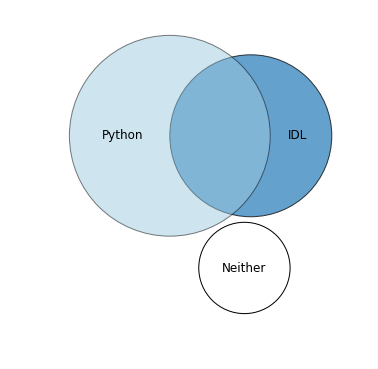

In [94]:
nall = np.sum(uses_idl|uses_python)
npy = np.sum(uses_python)
nidl = np.sum(uses_idl)
nboth = np.sum(uses_idl&uses_python)
nneither = len(data)-nall

print 'ALL: ', nall
print 'PYTHON: {} ({:.2f}%)'.format(npy, npy*100./nall)
print 'IDL: {} ({:.2f}%)'.format(nidl, nidl*100./nall)
print 'BOTH: {} ({:.2f}%)'.format(nboth, nboth*100./nall)
print 'NEITHER: {})'.format(nneither)

pyrad = (npy/np.pi)**0.5
idlrad = (nidl/np.pi)**0.5
overlaparea = (nboth/np.pi)**0.5
neitherrad = (nneither/np.pi)**0.5
def circle_sep_to_overlap_area(d, r1=pyrad, r2=idlrad):
    # formula from e.g. http://mathworld.wolfram.com/Circle-CircleIntersection.html
    d = np.array(d)
    r1 = np.array(r1)
    r2 = np.array(r2)
    
    swap = r1 > r2
    r1t = r1.copy()
    r2t = r2.copy()
    r1[swap] = r2t[swap]
    r2[swap] = r1t[swap]
    
    term1 = r1**2 * np.arccos((d**2+r1**2-r2**2)/(2*d*r1))
    term2 = r2**2 * np.arccos((d**2+r2**2-r1**2)/(2*d*r2))
    term3 = -0.5*np.sqrt((-d+r1+r2)*(d+r1-r2)*(d-r1+r2)*(d+r1+r2))
    res = np.array(term1 + term2+ term3)
    res[d<(r2-r1)] = np.pi*r1**2
    res[d>(r1+r2)] = 0
    return res   

sep = optimize.leastsq(lambda d:nboth-circle_sep_to_overlap_area(d), (pyrad+idlrad)/2)[0]
    

plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis('off')
ax.add_artist(plt.Circle((sep/2,15), idlrad, facecolor='#3182bd', alpha=.75, edgecolor='k'))
ax.add_artist(plt.Circle((-sep/2,15), pyrad, facecolor='#9ecae1', alpha=.5, edgecolor='k'))
ax.add_artist(plt.Circle((5.3, sep*.8 - pyrad), neitherrad, facecolor='none', alpha=1, lw=1, edgecolor='k'))
#plt.text(0,0, 'Both',ha='center', va='center', fontsize=24)
plt.text(sep+1,15, 'IDL',ha='center', va='center', fontsize=12)
plt.text(-sep-1,15, 'Python',ha='center', va='center', fontsize=12)
plt.text(5.3, sep*.8 - pyrad, 'Neither',ha='center', va='center', fontsize=12)


plt.xlim(-27, 25)
plt.ylim(-17, 35)

if save_plots:
    plt.savefig('venn_pyidl.png')

### Statistics by Career Stage

In [95]:
ucars = []
ncars = []
for car in np.unique(data['career']):
    if car is not np.ma.masked:
        ucars.append(car)
        ncars.append(np.sum(data['career']==car))
car_table = astropy.table.Table(data=[ucars, ncars], names=['career stage', 'number'])
car_table.sort('number')
car_table.reverse()
car_table.pprint(max_lines=np.inf)

                 career stage                 number
--------------------------------------------- ------
                             Graduate student    380
                                      Postdoc    340
                                      Faculty    210
                           Research scientist    175
                        Undergraduate student     10
                                  PhD student      2
                                     Engineer      2
                           unemployed postdoc      1
staff scientist on long-term disability leave      1
            staff scientist at an observatory      1
                                     mestrado      1
                             emeritus faculty      1
                               almost retired      1
                               Staff engineer      1
       Staff at FFRDC with some research time      1
                              Retired Faculty      1
                           Research assistant 

### Trends as a Function of Area of Research

In [96]:
np.unique(data['field']).pprint(max_lines=np.inf)

                                  field                                  
-------------------------------------------------------------------------
                                                        Archive Scientist
                                                      Astronomy eResearch
                                                    Astroparticle Physics
                                                          Astrostatistics
                                                                Cosmology
                                                          Instrumentation
                                                    Instrumentation Other
                                                Instrumentation Planetary
                                                                       --
                                                            Observational
                                      Observational Astroparticle physics
                                      

In [97]:
bool_obs = np.zeros(len(data['field']), dtype=bool)
bool_the = np.zeros(len(data['field']), dtype=bool)
bool_ins = np.zeros(len(data['field']), dtype=bool)
bool_pla = np.zeros(len(data['field']), dtype=bool)

for ii in range(len(data['field'])):
    if str(data['field'][ii]).count('Observational') > 0:
        bool_obs[ii]=True
    if str(data['field'][ii]).count('Theory') > 0:
        bool_the[ii]=True
    if str(data['field'][ii]).count('Instrumentation') > 0:
        bool_ins[ii]=True
    if str(data['field'][ii]).count('Planetary') > 0:
        bool_pla[ii]=True
print "Observations: {}.\n Theory: {}.\n Instrumentation: {}.\n Planetary: {}\n".format(np.sum(bool_obs), np.sum(bool_the), np.sum(bool_ins), np.sum(bool_pla))

Observations: 823.
 Theory: 353.
 Instrumentation: 130.
 Planetary: 66



['Yes', 'No', 'A little']
All:  7.8+-0.8,  43.1+-1.9,  49.1+-2.1
Observational:  7.5+-1.0,  46.0+-2.4,  46.5+-2.4
Theory:  8.2+-1.5,  39.1+-3.3,  52.7+-3.9
Instrumentation: 10.8+-2.9,  42.3+-5.7,  46.9+-6.0
Planetary:  3.0+-2.1,  40.9+-7.9,  56.1+-9.2


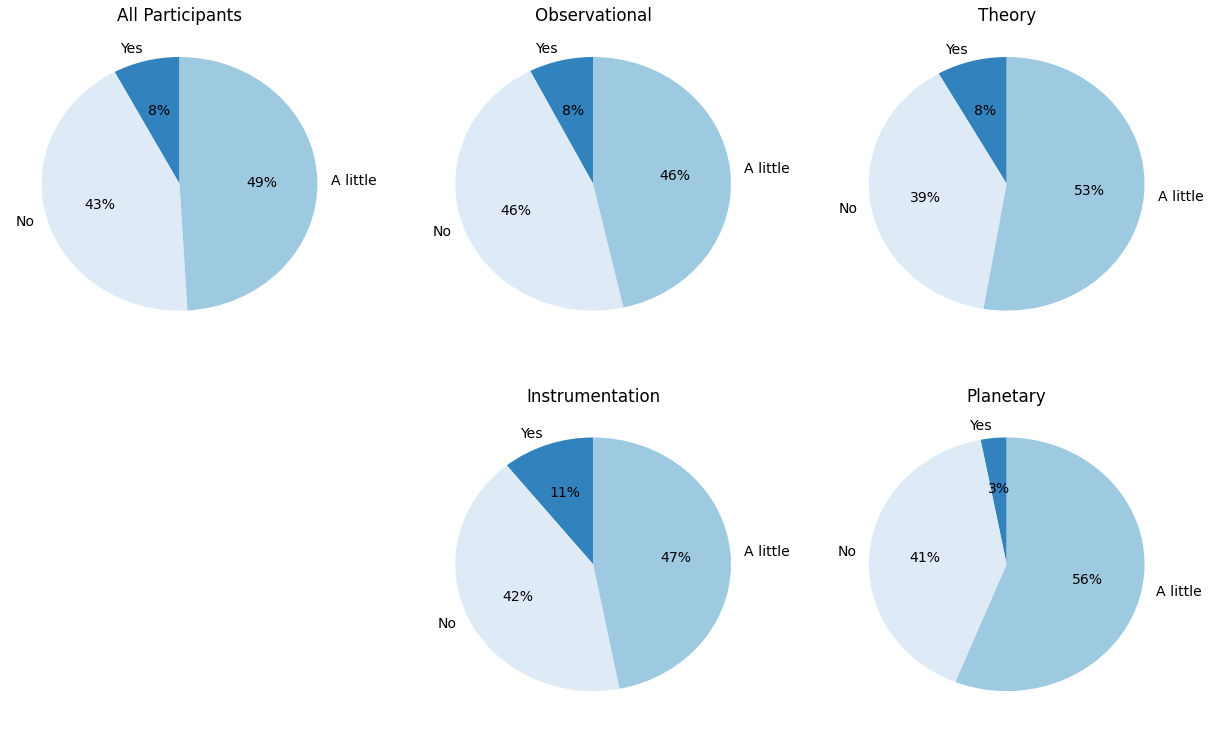

In [98]:
nn_all = [np.sum(data['training'] == 'Yes'), np.sum(data['training'] == 'No'), np.sum(data['training'] == 'Little')]

nn_obs = [np.sum((bool_obs) & (data['training'] == 'Yes')), np.sum((bool_obs) & (data['training'] == 'No')), np.sum((bool_obs) & (data['training'] == 'Little'))]
nn_the = [np.sum((bool_the) & (data['training'] == 'Yes')), np.sum((bool_the) & (data['training'] == 'No')), np.sum((bool_the) & (data['training'] == 'Little'))]
nn_ins = [np.sum((bool_ins) & (data['training'] == 'Yes')), np.sum((bool_ins) & (data['training'] == 'No')), np.sum((bool_ins) & (data['training'] == 'Little'))]
nn_pla = [np.sum((bool_pla) & (data['training'] == 'Yes')), np.sum((bool_pla) & (data['training'] == 'No')), np.sum((bool_pla) & (data['training'] == 'Little'))]

matplotlib.rcParams['font.size'] = 14

fig,axes = plt.subplots(1, 5, sharey=False, figsize=(21.,12.5))

#fig = plt.figure(1,figsize=(18,3))
a1 = plt.subplot(2,3,1)
labels = ['Yes','No','A little']
colors=['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All Participants')
a2 = plt.subplot(2,3,2)
a2.pie(nn_obs, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Observational')
a3 = plt.subplot(2,3,3)
a3.pie(nn_the, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('Theory')
a4 = plt.subplot(2,3,5)
a4.pie(nn_ins, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Instrumentation')
a5 = plt.subplot(2,3,6)
a5.pie(nn_pla, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a5.set_title('Planetary')

if save_plots:
    plt.savefig('training_by_field.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_obs)*100./np.sum(nn_obs)
a_err = np.sqrt(nn_obs)*100./np.sum(nn_obs)
print 'Observational: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_the)*100./np.sum(nn_the)
a_err = np.sqrt(nn_the)*100./np.sum(nn_the)
print 'Theory: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_ins)*100./np.sum(nn_ins)
a_err = np.sqrt(nn_ins)*100./np.sum(nn_ins)
print 'Instrumentation: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_pla)*100./np.sum(nn_pla)
a_err = np.sqrt(nn_pla)*100./np.sum(nn_pla)
print 'Planetary: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])



['My Own', 'Both', 'Others']
All: 32.7+-1.7,  56.8+-2.2,  10.5+-1.0
Observational: 28.9+-1.9,  59.1+-2.7,  12.0+-1.2
Theory: 42.5+-3.5,  51.3+-3.8,   6.2+-1.3
Instrumentation: 38.5+-5.4,  56.2+-6.6,   5.4+-2.0
Planetary: 31.8+-6.9,  51.5+-8.8,  16.7+-5.0


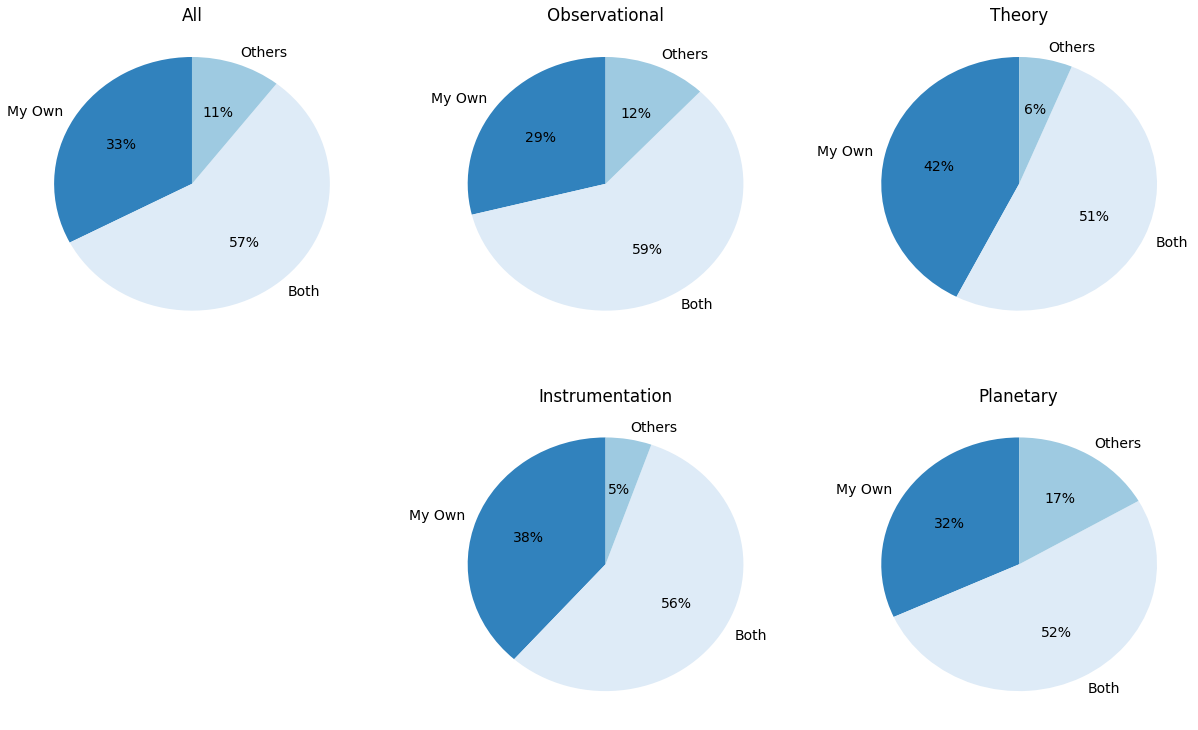

In [99]:
nn_all = [np.sum(data['own'] == 'Own'), np.sum(data['own'] == 'Between'), np.sum(data['own'] == 'Others')]
nn_obs = [np.sum((bool_obs) & (data['own'] == 'Own')), np.sum((bool_obs) & (data['own'] == 'Between')), np.sum((bool_obs) & (data['own'] == 'Others'))]
nn_the = [np.sum((bool_the) & (data['own'] == 'Own')), np.sum((bool_the) & (data['own'] == 'Between')), np.sum((bool_the) & (data['own'] == 'Others'))]
nn_ins = [np.sum((bool_ins) & (data['own'] == 'Own')), np.sum((bool_ins) & (data['own'] == 'Between')), np.sum((bool_ins) & (data['own'] == 'Others'))]
nn_pla = [np.sum((bool_pla) & (data['own'] == 'Own')), np.sum((bool_pla) & (data['own'] == 'Between')), np.sum((bool_pla) & (data['own'] == 'Others'))]

fig,axes = plt.subplots(1, 5, sharey=False, figsize=(21.,12.5))

fig = plt.figure(1,figsize=(18,3))
a1 = plt.subplot(2,3,1)
labels = ['My Own','Both','Others']
colors = ['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All')
a2 = plt.subplot(2,3,2)
a2.pie(nn_obs, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Observational')
a3 = plt.subplot(2,3,3)
a3.pie(nn_the, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('Theory')
a4 = plt.subplot(2,3,5)
a4.pie(nn_ins,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Instrumentation')
a4 = plt.subplot(2,3,6)
a4.pie(nn_pla,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Planetary')

if save_plots:
    plt.savefig('own_by_field.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_obs)*100./np.sum(nn_obs)
a_err = np.sqrt(nn_obs)*100./np.sum(nn_obs)
print 'Observational: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_the)*100./np.sum(nn_the)
a_err = np.sqrt(nn_the)*100./np.sum(nn_the)
print 'Theory: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_ins)*100./np.sum(nn_ins)
a_err = np.sqrt(nn_ins)*100./np.sum(nn_ins)
print 'Instrumentation: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_pla)*100./np.sum(nn_pla)
a_err = np.sqrt(nn_pla)*100./np.sum(nn_pla)
print 'Planetary: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


In [100]:
tools_obs = []
tools_the = []
tools_ins = []
tools_pla = []

for entry, jj in zip(data['software'],range(len(data['software']))):
    if entry:
        str(entry)
        entries = entry.lower().strip().split(' ')
        for ii in entries:
            if ii != '':
                if ii == 'c': ii = 'c/c++'
                if ii == 'c++': ii = 'c/c++'
                if bool_obs[jj]:
                    tools_obs.append(ii)
                if bool_the[jj]:
                    tools_the.append(ii)
                if bool_ins[jj]:
                    tools_ins.append(ii)
                if bool_pla[jj]:
                    tools_pla.append(ii)


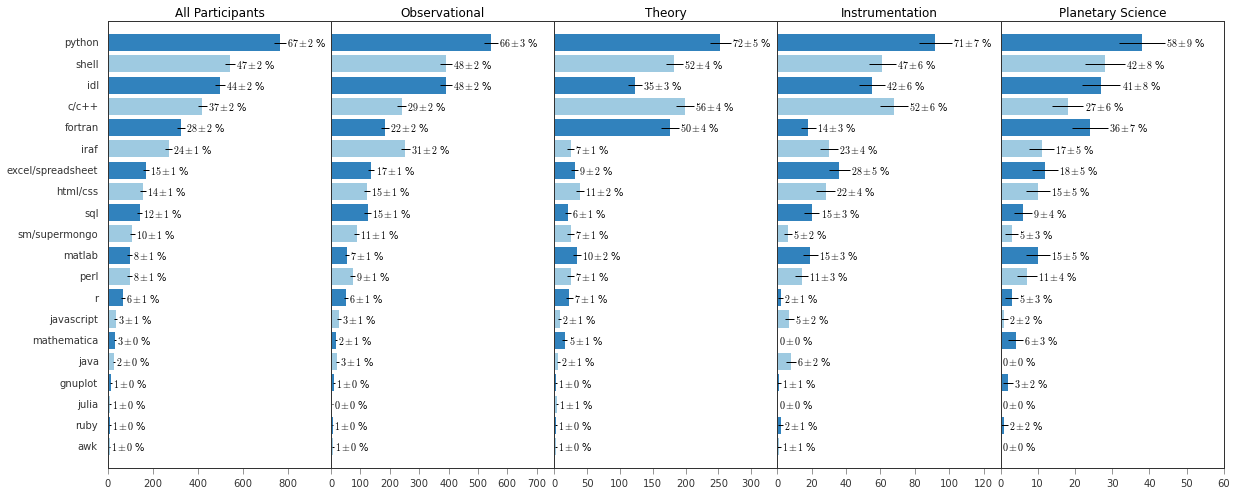

In [101]:
all_nn = [element[1] for element in nn[0:len_data]]

tools_obs_nn = {}
tools_obs_nn.update({ff: np.sum(np.array(tools_obs) == ff) for ff in unique_tools})
plot_obs_nn = [tools_obs_nn[name] for name in language_names]

tools_the_nn = {}
tools_the_nn.update({ff: np.sum(np.array(tools_the) == ff) for ff in unique_tools})
plot_the_nn = [tools_the_nn[name] for name in language_names]

tools_ins_nn = {}
tools_ins_nn.update({ff: np.sum(np.array(tools_ins) == ff) for ff in unique_tools})
plot_ins_nn = [tools_ins_nn[name] for name in language_names]

tools_pla_nn = {}
tools_pla_nn.update({ff: np.sum(np.array(tools_pla) == ff) for ff in unique_tools})
plot_pla_nn = [tools_pla_nn[name] for name in language_names]

matplotlib.rcParams['font.size'] = 10

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,5,1)
make_bars_segment(a1, bins, np.array(all_nn), language_names, len(data), 'All Participants', 990, 20)

a2 = plt.subplot(1,5,2)
make_bars_segment(a2, bins, np.array(plot_obs_nn), None, np.sum(bool_obs), 'Observational', 760, 20)

a3 = plt.subplot(1,5,3)
make_bars_segment(a3, bins, np.array(plot_the_nn), None, np.sum(bool_the), 'Theory', 340, 20)

a4 = plt.subplot(1,5,4)
make_bars_segment(a4, bins, np.array(plot_ins_nn), None, np.sum(bool_ins), 'Instrumentation', 130, 20)

a5 = plt.subplot(1,5,5)
make_bars_segment(a5, bins, np.array(plot_pla_nn), None, np.sum(bool_pla), 'Planetary Science', 60, 20)

if save_plots:
    plt.savefig('tools_by_field.png')

### Trends as a Function of Location

In [102]:
print np.sum(data['career'][data['location'] == 'United States of America'] == 'Postdoc')
print np.sum(data['location'] != 'United States of America')

120
587


In [103]:
ulocs = []
nlocs = []
for loc in np.unique(data['location']):
    if loc is not np.ma.masked:
        ulocs.append(loc)
        nlocs.append(np.sum(data['location']==loc))
loc_table = astropy.table.Table(data=[ulocs, nlocs], names=['location', 'number'])
loc_table.sort('number')
loc_table.reverse()
loc_table.pprint(max_lines=np.inf)

        location         number
------------------------ ------
United States of America    546
                 Germany    170
          United Kingdom     90
               Australia     69
                   Chile     35
             Netherlands     31
                  Sweden     21
               Argentina     19
                  Canada     18
                  Brazil     14
                  France     13
                   Spain     12
                   Italy     11
             Switzerland      9
                  Poland      9
                  Mexico      9
                  Israel      6
                 Denmark      5
                Portugal      3
                   Japan      3
                 Ireland      3
                   India      3
                 Finland      3
    United Arab Emirates      2
             South Korea      2
            South Africa      2
                  Russia      2
             New Zealand      2
             Korea South      2
        

In [104]:
for country in ['United States of America','United Kingdom','Germany','Australia']:
    print "{}:\n total: {}\n grads: {}\n postdocs: {}\n faculty & researchers: {}\n".format(country, np.sum(data['location'] == country),np.sum(data['career'][data['location'] == country] == 'Graduate student'),np.sum(data['career'][data['location'] == country] == 'Postdoc'),np.sum(data['career'][data['location'] == country] == 'Faculty') + np.sum(data['career'][data['location'] == country] == 'Research scientist'))

United States of America:
 total: 546
 grads: 192
 postdocs: 120
 faculty & researchers: 215

United Kingdom:
 total: 90
 grads: 22
 postdocs: 42
 faculty & researchers: 23

Germany:
 total: 170
 grads: 62
 postdocs: 60
 faculty & researchers: 42

Australia:
 total: 69
 grads: 24
 postdocs: 25
 faculty & researchers: 18



['Yes', 'No', 'A little']
All:  7.8+-0.8,  43.1+-1.9,  49.1+-2.1
US:  5.9+-1.0,  39.0+-2.7,  55.1+-3.2
UK:  8.9+-3.1,  46.7+-7.2,  44.4+-7.0
DE: 10.7+-2.5,  49.7+-5.4,  39.6+-4.8
AU: 10.1+-3.8,  55.1+-8.9,  34.8+-7.1
Non-US:  9.6+-1.3,  46.6+-2.8,  43.9+-2.7


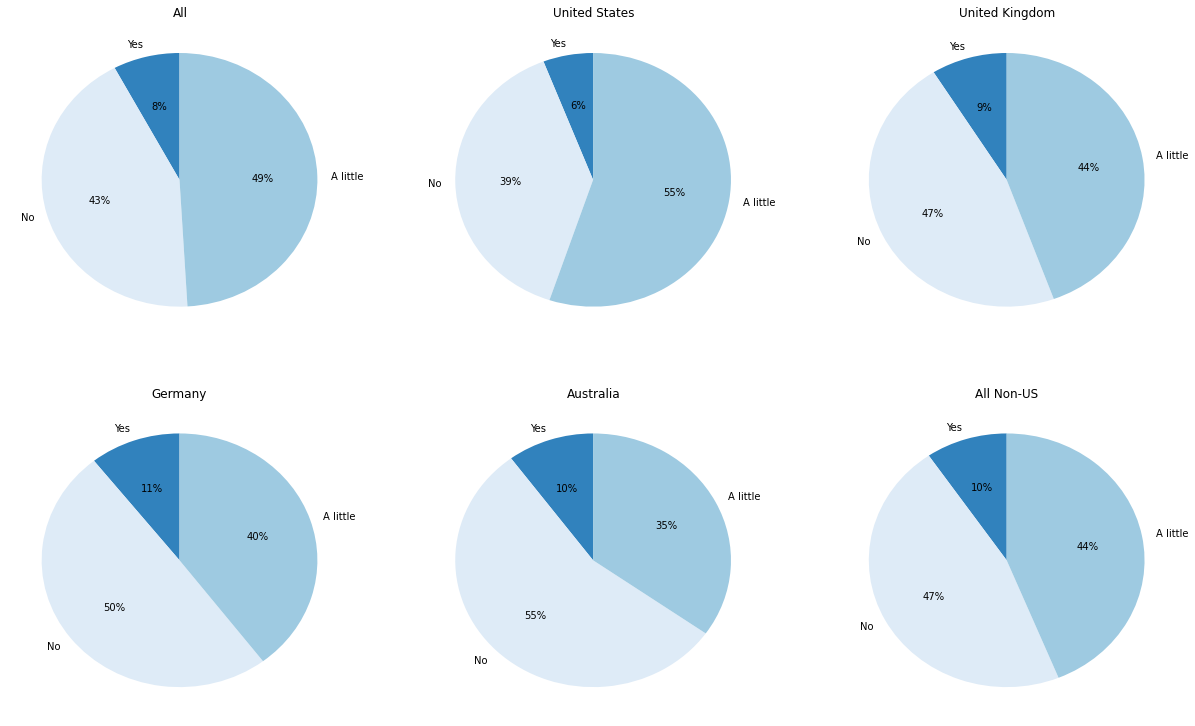

In [105]:
nn_all = [np.sum(data['training'] == 'Yes'), np.sum(data['training'] == 'No'), np.sum(data['training'] == 'Little')]

nn_us = [np.sum((data['location'] == 'United States of America') & (data['training'] == 'Yes')), np.sum((data['location'] == 'United States of America') & (data['training'] == 'No')), np.sum((data['location'] == 'United States of America') & (data['training'] == 'Little'))]
nn_uk = [np.sum((data['location'] == 'United Kingdom') & (data['training'] == 'Yes')), np.sum((data['location'] == 'United Kingdom') & (data['training'] == 'No')), np.sum((data['location'] == 'United Kingdom') & (data['training'] == 'Little'))]
nn_de = [np.sum((data['location'] == 'Germany') & (data['training'] == 'Yes')), np.sum((data['location'] == 'Germany') & (data['training'] == 'No')), np.sum((data['location'] == 'Germany') & (data['training'] == 'Little'))]
nn_au = [np.sum((data['location'] == 'Australia') & (data['training'] == 'Yes')), np.sum((data['location'] == 'Australia') & (data['training'] == 'No')), np.sum((data['location'] == 'Australia') & (data['training'] == 'Little'))]
nn_non_us = [np.sum((data['location'] != 'United States of America') & (data['training'] == 'Yes')), np.sum((data['location'] != 'United States of America') & (data['training'] == 'No')), np.sum((data['location'] != 'United States of America') & (data['training'] == 'Little'))]

fig,axes = plt.subplots(1, 6, sharey=False, figsize=(21.,12.5))

#fig = plt.figure(1,figsize=(21.6,3))
a1 = plt.subplot(2,3,1)
labels = ['Yes','No','A little']
colors=['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All')
a2 = plt.subplot(2,3,2)
a2.pie(nn_us, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('United States')
a3 = plt.subplot(2,3,3)
a3.pie(nn_uk, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('United Kingdom')
a4 = plt.subplot(2,3,4)
a4.pie(nn_de, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Germany')
a5 = plt.subplot(2,3,5)
a5.pie(nn_au, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a5.set_title('Australia')
a5 = plt.subplot(2,3,6)
a5.pie(nn_non_us, labels=labels, colors = colors, autopct='%1.0f%%', shadow=False, startangle=90)
a5.set_title('All Non-US')

if save_plots:
    plt.savefig('training_by_country.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_us)*100./np.sum(nn_us)
a_err = np.sqrt(nn_us)*100./np.sum(nn_us)
print 'US: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_uk)*100./np.sum(nn_uk)
a_err = np.sqrt(nn_uk)*100./np.sum(nn_uk)
print 'UK: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_de)*100./np.sum(nn_de)
a_err = np.sqrt(nn_de)*100./np.sum(nn_de)
print 'DE: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_au)*100./np.sum(nn_au)
a_err = np.sqrt(nn_au)*100./np.sum(nn_au)
print 'AU: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_non_us)*100./np.sum(nn_non_us)
a_err = np.sqrt(nn_non_us)*100./np.sum(nn_non_us)
print 'Non-US: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


['My Own', 'Both', 'Others']
All: 32.7+-1.7,  56.8+-2.2,  10.5+-1.0
US: 32.1+-2.4,  59.3+-3.3,   8.6+-1.3
UK: 34.4+-6.2,  60.0+-8.2,   5.6+-2.5
DE: 37.6+-4.7,  51.8+-5.5,  10.6+-2.5
AU: 23.2+-5.8,  66.7+-9.8,  10.1+-3.8
Non-US: 33.4+-2.4,  54.5+-3.0,  12.1+-1.4


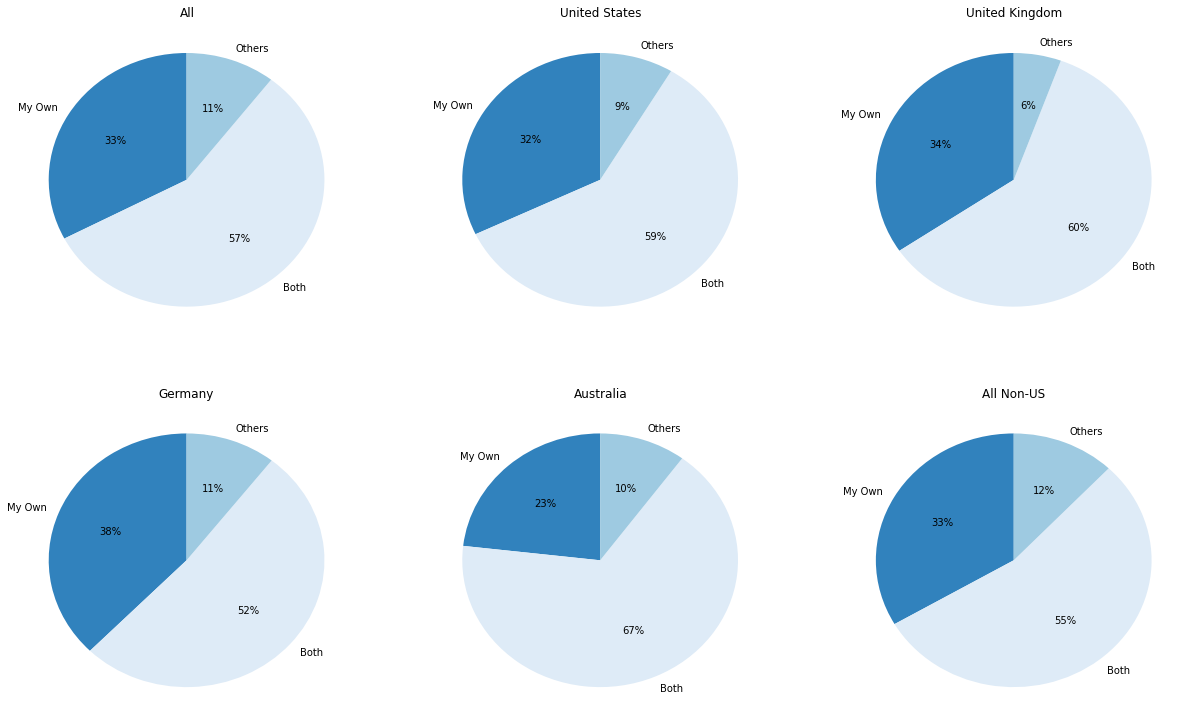

In [106]:
nn_all = [np.sum(data['own'] == 'Own'), np.sum(data['own'] == 'Between'), np.sum(data['own'] == 'Others')]
nn_us = [np.sum((data['location'] == 'United States of America') & (data['own'] == 'Own')), np.sum((data['location'] == 'United States of America') & (data['own'] == 'Between')), np.sum((data['location'] == 'United States of America') & (data['own'] == 'Others'))]
nn_uk = [np.sum((data['location'] == 'United Kingdom') & (data['own'] == 'Own')), np.sum((data['location'] == 'United Kingdom') & (data['own'] == 'Between')), np.sum((data['location'] == 'United Kingdom') & (data['own'] == 'Others'))]
nn_de = [np.sum((data['location'] == 'Germany') & (data['own'] == 'Own')), np.sum((data['location'] == 'Germany') & (data['own'] == 'Between')), np.sum((data['location'] == 'Germany') & (data['own'] == 'Others'))]
nn_au = [np.sum((data['location'] == 'Australia') & (data['own'] == 'Own')), np.sum((data['location'] == 'Australia') & (data['own'] == 'Between')), np.sum((data['location'] == 'Australia') & (data['own'] == 'Others'))]
nn_non_us = [np.sum((data['location'] != 'United States of America') & (data['own'] == 'Own')), np.sum((data['location'] != 'United States of America') & (data['own'] == 'Between')), np.sum((data['location'] != 'United States of America') & (data['own'] == 'Others'))]

fig,axes =plt.subplots(1, 6, sharey=False, figsize=(21.,12.5))

#fig = plt.figure(1,figsize=(12,10))
a1 = plt.subplot(2,3,1)
labels = ['My Own','Both','Others']
colors = ['#3182bd','#deebf7','#9ecae1']
a1.pie(nn_all, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('All')
a2 = plt.subplot(2,3,2)
a2.pie(nn_us, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('United States')
a3 = plt.subplot(2,3,3)
a3.pie(nn_uk, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a3.set_title('United Kingdom')
a4 = plt.subplot(2,3,4)
a4.pie(nn_de,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a4.set_title('Germany')
a5 = plt.subplot(2,3,5)
a5.pie(nn_au,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a5.set_title('Australia')
a6 = plt.subplot(2,3,6)
a6.pie(nn_non_us,labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a6.set_title('All Non-US')

if save_plots:
    plt.savefig('own_by_country.png')
    
print labels
a = np.array(nn_all)*100./np.sum(nn_all)
a_err = np.sqrt(nn_all)*100./np.sum(nn_all)
print 'All: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_us)*100./np.sum(nn_us)
a_err = np.sqrt(nn_us)*100./np.sum(nn_us)
print 'US: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_uk)*100./np.sum(nn_uk)
a_err = np.sqrt(nn_uk)*100./np.sum(nn_uk)
print 'UK: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_de)*100./np.sum(nn_de)
a_err = np.sqrt(nn_de)*100./np.sum(nn_de)
print 'DE: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_au)*100./np.sum(nn_au)
a_err = np.sqrt(nn_au)*100./np.sum(nn_au)
print 'AU: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])
a = np.array(nn_non_us)*100./np.sum(nn_non_us)
a_err = np.sqrt(nn_non_us)*100./np.sum(nn_non_us)
print 'Non-US: {:4.1f}+-{:.1f}, {:5.1f}+-{:.1f}, {:5.1f}+-{:.1f}'.format(a[0], a_err[0], a[1], a_err[1],a[2], a_err[2])


In [107]:
tools_us = []
tools_uk = []
tools_de = []
tools_au = []
tools_non_us = []

for entry, country in zip(data['software'],data['location']):
    if entry:
        str(entry)
        entries = entry.lower().strip().split(' ')
        for ii in entries:
            if ii != '':
                if ii == 'c': ii = 'c/c++'
                if ii == 'c++': ii = 'c/c++'
                if country == 'United States of America':
                    tools_us.append(ii)
                if country == 'United Kingdom':
                    tools_uk.append(ii)
                if country == 'Germany':
                    tools_de.append(ii)
                if country == 'Australia':
                    tools_au.append(ii)
                if country != 'United States of America':
                    tools_non_us.append(ii)


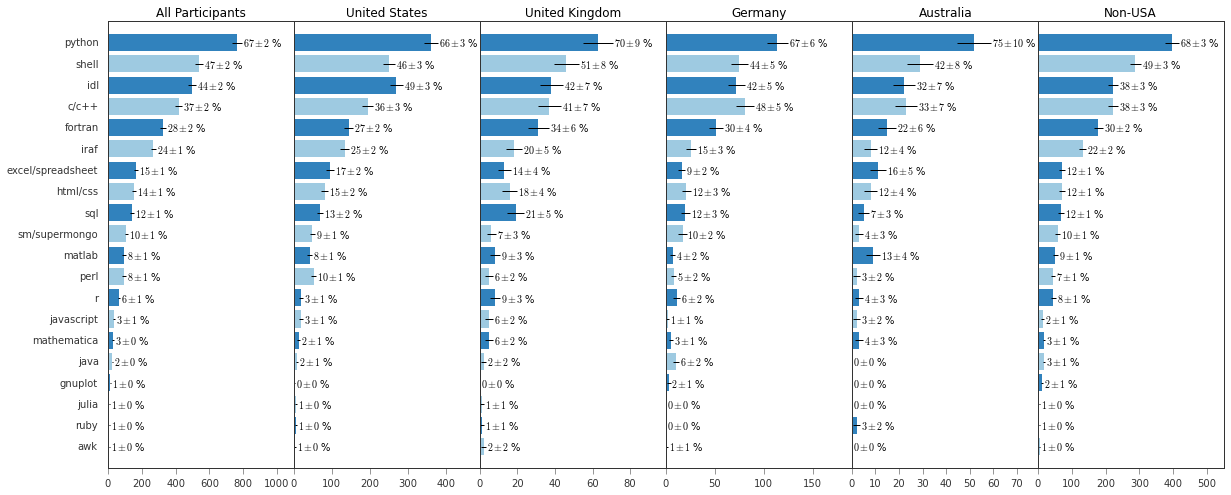

In [108]:
tools_us_nn = {}
tools_us_nn.update({ff: np.sum(np.array(tools_us) == ff) for ff in unique_tools})
plot_us_nn = [tools_us_nn[name] for name in language_names]

tools_uk_nn = {}
tools_uk_nn.update({ff: np.sum(np.array(tools_uk) == ff) for ff in unique_tools})
plot_uk_nn = [tools_uk_nn[name] for name in language_names]

tools_de_nn = {}
tools_de_nn.update({ff: np.sum(np.array(tools_de) == ff) for ff in unique_tools})
plot_de_nn = [tools_de_nn[name] for name in language_names]

tools_au_nn = {}
tools_au_nn.update({ff: np.sum(np.array(tools_au) == ff) for ff in unique_tools})
plot_au_nn = [tools_au_nn[name] for name in language_names]

tools_nonus_nn = {}
tools_nonus_nn.update({ff: np.sum(np.array(tools_non_us) == ff) for ff in unique_tools})
plot_nonus_nn = [tools_nonus_nn[name] for name in language_names]

bins = np.arange(len_data, 0, -1)
colors = ['#3182bd','#9ecae1']*int(math.ceil(len_data/2))
fig,axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,6,1)
make_bars_segment(a1, bins, np.array(all_nn), language_names, np.sum(nn_all), 'All Participants', 1100, 20)

a2 = plt.subplot(1,6,2)
make_bars_segment(a2, bins, np.array(plot_us_nn), None, np.sum(nn_us), 'United States', 490, 20)

a3 = plt.subplot(1,6,3)
make_bars_segment(a3, bins, np.array(plot_uk_nn), None, np.sum(nn_uk), 'United Kingdom', 99, 20)

a4 = plt.subplot(1,6,4)
make_bars_segment(a4, bins, np.array(plot_de_nn), None, np.sum(nn_de), 'Germany', 190, 20)

a5 = plt.subplot(1,6,5)
make_bars_segment(a5, bins, np.array(plot_au_nn), None, np.sum(nn_au), 'Australia', 79, 20)

a6 = plt.subplot(1,6,6)
make_bars_segment(a6, bins, np.array(plot_nonus_nn), None, np.sum(nn_non_us), 'Non-USA', 550, 20)

if save_plots:
    plt.savefig('tools_by_country.png')

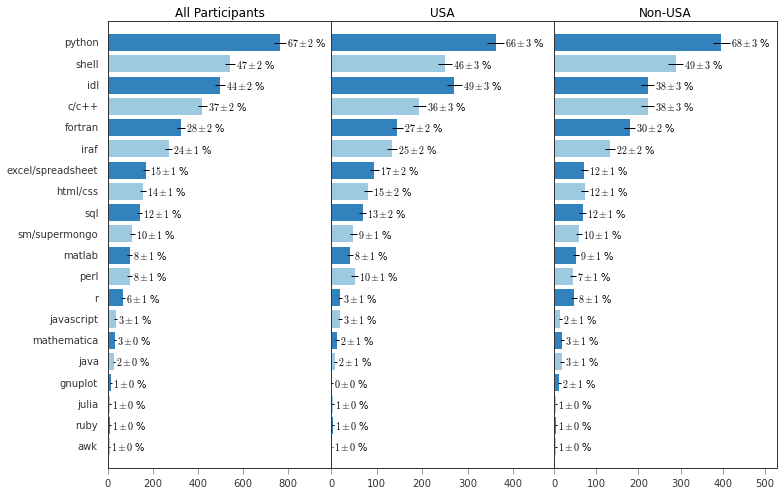

In [109]:
fig,axes = plt.subplots(1, 3, sharey=True, figsize=(12,8))
fig.subplots_adjust(wspace=0)

a1 = plt.subplot(1,3,1)
make_bars_segment(a1, bins, np.array(all_nn), language_names, np.sum(nn_all), 'All Participants', 990, 20)

a2 = plt.subplot(1,3,2)
make_bars_segment(a2, bins, np.array(plot_us_nn), None, np.sum(nn_us), 'USA', 490, 20)

a3 = plt.subplot(1,3,3)
make_bars_segment(a3, bins, np.array(plot_nonus_nn), None, np.sum(nn_non_us), 'Non-USA', 530, 20)

### Comments

In [110]:
commentdata = astropy.io.ascii.read('randomized_comments.csv', comment='#', delimiter=',')

In [111]:
print "COMMENTS FROM GRADUATE STUDENTS:"
for comment, career in zip(commentdata['comment'],commentdata['career']):
    if career == 'Graduate student' and comment:
        print '* {}'.format(comment)
    

COMMENTS FROM GRADUATE STUDENTS:
* Great survey! I hope this knowledge gets put to good use :)
* Formal training on astronomical software packages as part of my astronomy undergraduate degree would have been very helpful for me.
* More formal training in software use/development would be wonderful.
* I think it should be strongly recommended that people going into Astronomy should take programming classes. In fact I would make it part of the required course work to get a B.S. in Physics or Astronomy.Most astronomers I know did not take any formal programming course we learned as we went along. Most of us write our own code and many do not use good coding practices making reading or adapting code from other Astronomers a lot more painful than it should be.
* Double major in Physics and Computational Science for my Bachelor's.
* go go astropy!
* The existing python-related software is amazing but the documentation is confusing and needs more examples.
* Lots (if not most of them) of astr

In [112]:
print "COMMENTS FROM POSTDOCS:"
for comment, career in zip(commentdata['comment'],commentdata['career']):
    if career == 'Postdoc' and comment:
        print '* {}'.format(comment)


COMMENTS FROM POSTDOCS:
* Not really sure what counts as "a lot" of software development training. Took 1.5 years of CS courses at the start of my undergraduate degree along with a lot of exposure to implementing numerical methods in applied maths. But little to no training since undergrad; all self-taught (notably in Fortran which I now use regularly).
* Mercurial is my VC of choice though I'm comfortable using git when I have to.
* I <3 Ruby
* Many astronomers (including myself) use ancient codes and data reduction software (IRAF MIDAS IDL) that are not easily portable to 21st century computer platforms. National observatories and funding agencies need to invest either in maintenance of these ancient codes or in redevelopment of common data reduction and analysis software. I consider this a severe bottleneck in the productivity of the astronomical community at large.
* I learned IDL as an undergrad (class of 2004) and used it nearly exclusively for data reduction plotting and analysi

In [113]:
print "COMMENTS FROM RESEARCH SCIENTISTS:"
for comment, career in zip(commentdata['comment'],commentdata['career']):
    if career == 'Research scientist' and comment:
        print '* {}'.format(comment)


COMMENTS FROM RESEARCH SCIENTISTS:
* If you also want to know what code I use not write it is C Python Matlab IRAF.
* I share (and document and maintain) all of the analysis code I write and have users all over the world.
* use AIPS MIRIAD and astroimage J
* Nowadays I tend to use python/numpy for most of my work with C or Cuda C (if using parallel GPU cores) for compute expensive operations.
* I find that my observational colleagues are often unaware that we as computational scientists need to write proposals for supercomputers like they write for telescopes.  Also when we write science proposals (e.g. NASA NSF) we have to lie about how much time we will spend developing code say only a few months when in reality it occupies most of the grant period since code development is frowned upon (except within the new NASA ROSES program PDART started in 2014).
* Great idea and survey!!!Would be fantastic to see the results especially as a function of location and research stage!!CheersNic
* I

In [114]:
print "COMMENTS FROM FACULTY:"
for comment, career in zip(commentdata['comment'],commentdata['career']):
    if career == 'Faculty' and comment:
        print '* {}'.format(comment)


COMMENTS FROM FACULTY:
* I would love to see the results of this survey!
* Don't mind me. I'm a dinosaur.
* I'm intending to try out Python soon.
* At this stage of my career most of the serious coding is done by my graduate students or postdocs.  I was at the cutting edge of the field long ago but my knowledge and skill s haven't kept up.  At some level that doesn't matter so much provided I have capable collaborators.  However it would certainly be useful to have good ideas on practice and high-performance computing techniques so that I can advise my students better.  The general point here is that needs of senior faculty are rather different from those of junior researchers.  The other obvious point relevant to everyone is that it's hard to carve out time for learning about software practices in the abstract which is why we all tend to do what we can to "teach ourselves on the fly" with whatever resources we can come up with.  The time-cost to benefit ratio is different for research